## Observations and Insights 

In [15]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "/Users/yaden/Desktop/matplotlib/Resources/Mouse_metadata.csv"
study_results_path = "/Users/yaden/Desktop/matplotlib/Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_dataset = pd.merge(mouse_metadata, study_results)
# Display the data table for preview
combined_dataset.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [16]:
# Checking the number of mice.
total_mice = combined_dataset['Mouse ID'].count()
total_mice_df = pd.DataFrame({"Total Number of Mice":[total_mice]})
total_mice_df

,Total Number of Mice
0,1893


In [216]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
clean_df=combined_dataset.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
clean_df.head(50)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [18]:
# Optional: Get all the data for the duplicate mouse ID. 

# combined_dataset.loc[combined_dataset.loc[:, 'Mouse ID']=='g989']

In [217]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
new_total = clean_df['Mouse ID'].count()
new_total_count = pd.DataFrame({"Total Number of Mice":[new_total]})


In [218]:
# Checking the number of mice in the clean DataFrame.

new_total_count

,Total Number of Mice
0,1888


## Summary Statistics

In [219]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.


summary_df = clean_df.groupby("Drug Regimen")
summary_table = summary_df.agg(\
                               tumor_size_mean=('Tumor Volume (mm3)', np.mean),\
                               tumor_size_median=('Tumor Volume (mm3)', np.median),\
                               tumor_size_var=('Tumor Volume (mm3)', np.var),\
                               tumor_size_std=('Tumor Volume (mm3)', np.std),\
                               tumor_size_sem=('Tumor Volume (mm3)', st.sem))

summary_table



,tumor_size_mean,tumor_size_median,tumor_size_var,tumor_size_std,tumor_size_sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [22]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

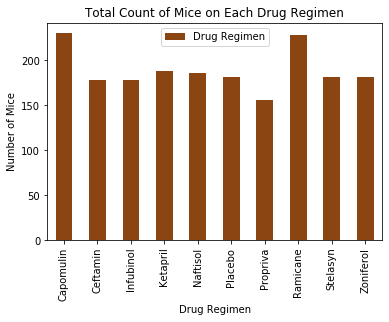

In [23]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
drug_group = clean_df.groupby('Drug Regimen')
drug_group_count = pd.DataFrame(drug_group['Drug Regimen'].count())
# drug_group_count

regimen_bar_chart = drug_group_count.plot(kind='bar', title="Total Count of Mice on Each Drug Regimen", color="saddlebrown")

plt.ylabel("Number of Mice")

plt.show()

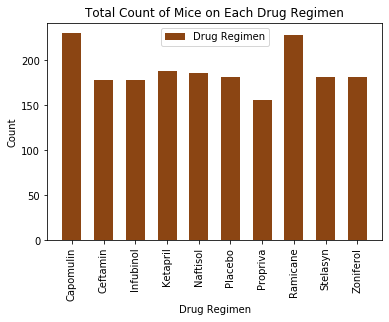

In [24]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
x_axis = np.arange(len(drug_group_count))
tick_locations = [value for value in x_axis]

# plt.figure(figsize=(9,8))
plt.bar(x_axis, drug_group_count["Drug Regimen"], color='saddlebrown', align="center", width = 0.60)
plt.xticks(tick_locations, list(drug_group_count.index), rotation="vertical")

plt.title("Total Count of Mice on Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Count")

column_name = ["Drug Regimen"]
plt.legend(column_name,loc="best")

plt.show()


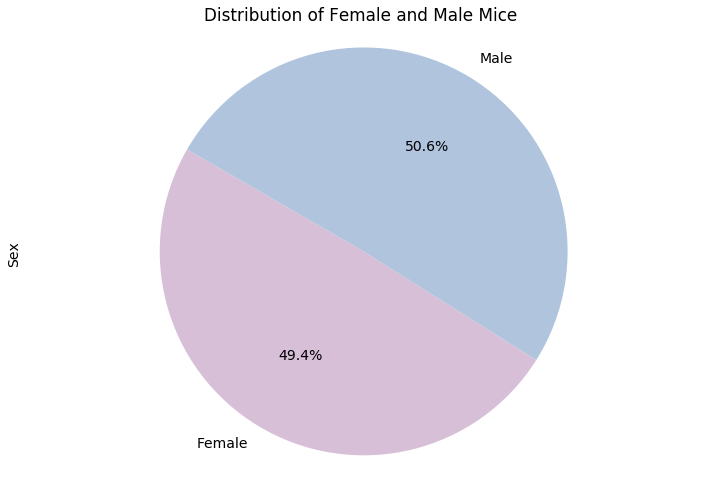

In [227]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_group = combined_dataset.groupby('Sex')
gender_group_count = pd.DataFrame(gender_group['Sex'].count())
gender_group_count.head()

pie_plot = gender_group_count.plot.pie(y='Sex', figsize=(10, 7), colors = ["thistle","lightsteelblue"], fontsize = 14,
                                      legend=False, title= "Distribution of Female and Male Mice",autopct='%1.1f%%',
                                      startangle = 150)



# Make the axis equal 
plt.axis("equal")
plt.tight_layout()
plt.show()



/Users/yaden/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


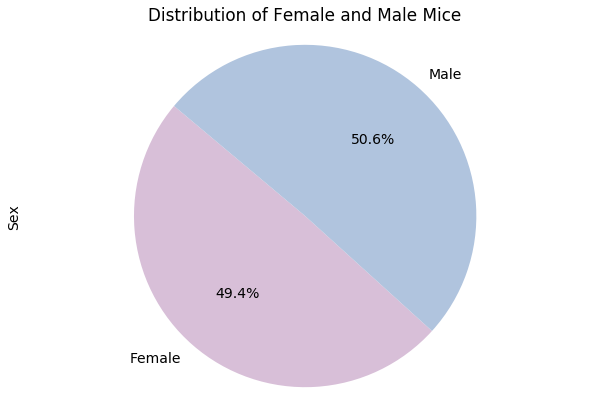

In [226]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
colors = ["thistle","lightsteelblue"]

# plt.figure()
pie_fig = plt.figure(figsize = (10, 7))

plt.pie(gender_group_count.values, labels=gender_group_count.index.values, colors=colors,
        autopct="%1.1f%%", shadow=False, startangle=140)



# Make axis equal
plt.axis("equal")
plt.ylabel("Sex")
plt.title("Distribution of Female and Male Mice")
plt.show()


## Quartiles, Outliers and Boxplots

In [27]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  

drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
drugs = combined_dataset[combined_dataset['Drug Regimen'].isin(drug_list)]

# drugs.head()

# Start by getting the last (greatest) timepoint for each mouse

# Get the last value of the 'Tumor Volume (mm3)' column using a lambda function selecting the element in -1 position

greatest_tumor = drugs.groupby(['Drug Regimen','Mouse ID']).agg(
    last_tumor_size=('Tumor Volume (mm3)',lambda drugs: drugs.iloc[-1])).round(3)
greatest_tumor

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


last_tumor_size
Drug Regimen Mouse ID                 
Capomulin    b128               38.983
             b742               38.940
             f966               30.486
             g288               37.074
             g316               40.159
...                                ...
Ramicane     s508               30.276
             u196               40.668
             w678               43.166
             y449               44.183
             z578               30.639

[100 rows x 1 columns]

In [233]:
# Restructuring dataframe
greatest_tumor_copy = greatest_tumor.stack(level=0).unstack(level=0)
# greatest_tumor_copy

In [234]:
counter = 0

# Put treatments into a list for for loop (and later for plot labels)
for drug in drug_list:
    quartiles = greatest_tumor_copy[drug].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[.25].round(2)
    upperq = quartiles[.75].round(2)
    iqr = round(upperq-lowerq, 2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)

# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 


    # Locate the rows which contain mice on each drug and get the tumor volumes
    if counter == 0:
        print(f"--------------------------------------------------------")
    print(f"{drug} IQR data is:")
    print(f"The lower quartile of {drug} is: {lowerq}")
    print(f"The upper quartile of {drug} is: {upperq}")
    print(f"The interquartile range of {drug} is: {iqr}")
    print(f"The the median of {drug} is: {quartiles[0.5]} ")
    print(f"Values below {lower_bound} for {drug} could be outliers.")
    print(f"Values above {upper_bound} for {drug} could be outliers.")
    print(f"--------------------------------------------------------")
    counter += 1
    
    
    # Determine outliers using upper and lower bounds
    

--------------------------------------------------------
Capomulin IQR data is:
The lower quartile of Capomulin is: 32.38
The upper quartile of Capomulin is: 40.16
The interquartile range of Capomulin is: 7.78
The the median of Capomulin is: 38.12 
Values below 20.71 for Capomulin could be outliers.
Values above 51.83 for Capomulin could be outliers.
--------------------------------------------------------
Ramicane IQR data is:
The lower quartile of Ramicane is: 31.56
The upper quartile of Ramicane is: 40.66
The interquartile range of Ramicane is: 9.1
The the median of Ramicane is: 36.56 
Values below 17.91 for Ramicane could be outliers.
Values above 54.31 for Ramicane could be outliers.
--------------------------------------------------------
Infubinol IQR data is:
The lower quartile of Infubinol is: 54.05
The upper quartile of Infubinol is: 65.53
The interquartile range of Infubinol is: 11.48
The the median of Infubinol is: 60.16 
Values below 36.83 for Infubinol could be outliers.


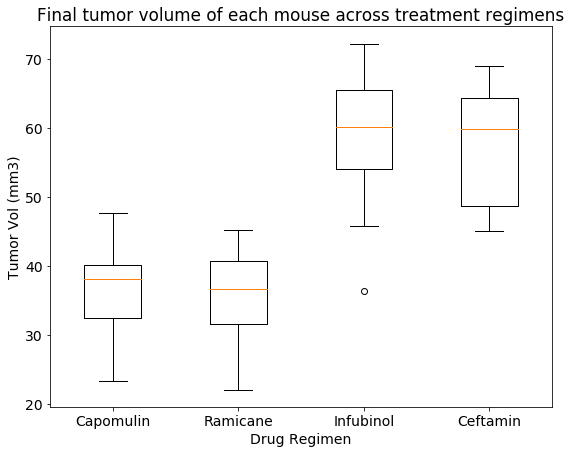

In [372]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
box_plot = []
colors = [ 'green', 'purple', 'tan', 'pink']

for drug in drug_list:
    box_plot.append(list(greatest_tumor_copy[drug].dropna()))

fig1, ax = plt.subplots(figsize=(9,7))
ax.set_title('Final Tumor Volume of Each Mouse Across Treatments')
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Tumor Volume (mm3)')
ax.boxplot(box_plot,notch=0)
plt.xticks([1,2,3,4],drug_list)

plt.show()

## Line and Scatter Plots

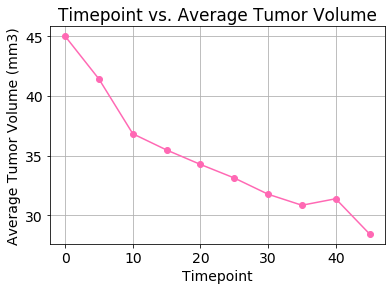

In [236]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
plot_data = combined_dataset[(combined_dataset["Drug Regimen"] == "Capomulin") & (combined_dataset["Mouse ID"] == "m601")]
line_plot = plot_data.groupby(["Drug Regimen", "Timepoint","Mouse ID"])


# Converting above variables into a dataframe grouped by drug regimen and timepoint
tumor_data_table = line_plot["Tumor Volume (mm3)"].mean().to_frame()
tumor_data_table


xAxis = [0,5,10,15,20,25,30,35,40,45]
tumor_final = plt.plot(xAxis, tumor_data_table, marker= "o", color="hotpink", label="Total Tumor Volume")

# plt.legend(handles=[tumor_final], loc="best")
plt.title("Timepoint vs. Average Tumor Volume")

plt.xlabel("Timepoint")
plt.ylabel("Average Tumor Volume (mm3)")
plt.grid(True)
plt.show()

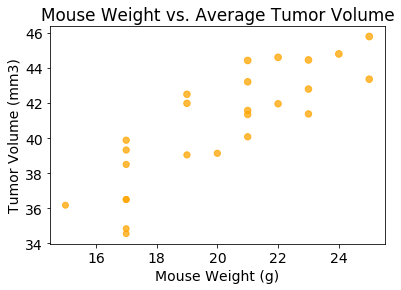

In [237]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

scatter_data = combined_dataset[(combined_dataset["Drug Regimen"] == "Capomulin")] 
scatter_plot = scatter_data.groupby(["Drug Regimen","Mouse ID", "Weight (g)"])
# scatter_plot_data = scatter_plot["Tumor Volume (mm3)"].mean().to_frame()



scatter_data = scatter_plot.agg(\

        tumor_size_mean=('Tumor Volume (mm3)', np.mean),\
                                weight_mean = ("Weight (g)", np.mean)\
                               ).round(3)

scatter_data

plt.scatter(
    scatter_data["weight_mean"],
    scatter_data["tumor_size_mean"],
    marker = 'o',
    facecolors = 'orange',
    edgecolors = 'orange',
    s= scatter_data["tumor_size_mean"],
    alpha = 0.75)
    
    
plt.title("Mouse Weight vs. Average Tumor Volume")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

## Correlation and Regression

In [207]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(scatter_data["weight_mean"], scatter_data["tumor_size_mean"])
print(f"The correlation between both factors is {round(correlation[0], 3)}.")

The correlation between both factors is 0.842.


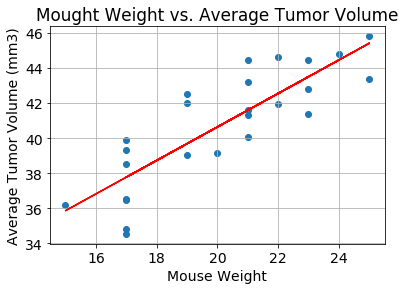

In [215]:
x_values = scatter_data["weight_mean"]
y_values = scatter_data["tumor_size_mean"]

# plt.figure()
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_equation = "y =" + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

plt.title("Mought Weight vs. Average Tumor Volume")
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume (mm3)")
plt.grid(True)

plt.show()
#look for line regression matplotlib